### LINCI FELICITA P
### CB.SC.I5DAS18022 
### RNN ASSIGNMENT : 26-11-2021

# --------------------------------------------------
### **TEXT GENERATOR USING RNN-LSTM**
# -------------------------------------------------- 

### **Importing all the necessary libraries**

In [ ]:
 import numpy as np
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras.layers import Dense, LSTM, Embedding
 import matplotlib.pyplot as plt 

### **Download Text Data**

In [ ]:
 file_URL = "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt"
 file_name= "shakespeare.txt"
 # get the file path
 path = keras.utils.get_file(file_name, file_URL) 

In [ ]:
raw = open(path, 'rb').read()
print(raw[250:400]) 

b"\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it "


In [ ]:
 text = raw.decode(encoding='utf-8')
 print(text[250:400]) 


All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it 


In [ ]:
len(text)

1115394

### **Vectorize Word Characters into Integers**

In [ ]:
 # unique characters
 vocabulary = np.array(sorted(set(text)))
 len(vocabulary)

65

In [ ]:
# assign an integer to each character
tokenizer = {char:i for i,char in enumerate(vocabulary)} 

In [ ]:
 # check characters and its corresponding integer
 for i in range(65):
     char = vocabulary[i]
     token = tokenizer[char]
     print('%4s : %4d'%(repr(char),token))

'\n' :    0
 ' ' :    1
 '!' :    2
 '$' :    3
 '&' :    4
 "'" :    5
 ',' :    6
 '-' :    7
 '.' :    8
 '3' :    9
 ':' :   10
 ';' :   11
 '?' :   12
 'A' :   13
 'B' :   14
 'C' :   15
 'D' :   16
 'E' :   17
 'F' :   18
 'G' :   19
 'H' :   20
 'I' :   21
 'J' :   22
 'K' :   23
 'L' :   24
 'M' :   25
 'N' :   26
 'O' :   27
 'P' :   28
 'Q' :   29
 'R' :   30
 'S' :   31
 'T' :   32
 'U' :   33
 'V' :   34
 'W' :   35
 'X' :   36
 'Y' :   37
 'Z' :   38
 'a' :   39
 'b' :   40
 'c' :   41
 'd' :   42
 'e' :   43
 'f' :   44
 'g' :   45
 'h' :   46
 'i' :   47
 'j' :   48
 'k' :   49
 'l' :   50
 'm' :   51
 'n' :   52
 'o' :   53
 'p' :   54
 'q' :   55
 'r' :   56
 's' :   57
 't' :   58
 'u' :   59
 'v' :   60
 'w' :   61
 'x' :   62
 'y' :   63
 'z' :   64


In [ ]:
 vector = np.array([tokenizer[char] for char in text])
 print('\nSample Text \n')
 print('-'*70)
 print(text[:100])
 print('-'*70)
 print('\n\nCorresponding Integer Vector \n')
 print('-'*70)
 print(vector[:100])
 print('-'*70) 


Sample Text 

----------------------------------------------------------------------
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You
----------------------------------------------------------------------


Corresponding Integer Vector 

----------------------------------------------------------------------
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59]
----------------------------------------------------------------------


In [ ]:
# convert into tensors
vector = tf.data.Dataset.from_tensor_slices(vector)
 # make sequences each of length 100 characters
sequences = vector.batch(100, drop_remainder=True)

In [ ]:
def prepare_dataset(seq):
  input_vector = seq[:-1]
  target_vector = seq[1:]
  return input_vector, target_vector
dataset = sequences.map(prepare_dataset)

In [ ]:
 # check how it looks
 for inp, tar in dataset.take(1):
     print(inp.numpy())
     print(tar.numpy())
     inp_text = ''.join(vocabulary[inp])
     tar_text = ''.join(vocabulary[tar])
     print(repr(inp_text))
     print(repr(tar_text)) 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53]
[47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49  6
  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0
 37 53 59]
'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYo'
'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'


In [ ]:
 AUTOTUNE = tf.data.AUTOTUNE
 # buffer size 10000
 # batch size 64
 data = dataset.batch(64, drop_remainder=True).repeat()
 data = data.prefetch(AUTOTUNE)
 # steps per epoch is number of batches available
 STEPS_PER_EPOCH = len(sequences)//64
 for inp, tar in data.take(1):
     print(inp.numpy().shape)
     print(tar.numpy().shape) 

(64, 99)
(64, 99)


### **RNN Model Building**

In [ ]:
model = keras.Sequential([
     # Embed len(vocabulary) into 64 dimensions
     Embedding(len(vocabulary), 64, batch_input_shape=[64,None]),
     # LSTM RNN layers
     LSTM(512, return_sequences=True, stateful=True),
     LSTM(512, return_sequences=True, stateful=True),
     # Classification head
     Dense(len(vocabulary))
 ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 64)            4160      
                                                                 
 lstm_1 (LSTM)               (64, None, 512)           1181696   
                                                                 
 lstm_2 (LSTM)               (64, None, 512)           2099200   
                                                                 
 dense_1 (Dense)             (64, None, 65)            33345     
                                                                 
Total params: 3,318,401
Trainable params: 3,318,401
Non-trainable params: 0
_________________________________________________________________


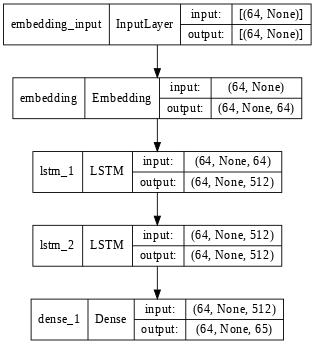

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=64)

### **Train the RNN Model**

In [ ]:
 # test whether the untrained model performs good
 for example_inp, example_tar in data.take(1):
     example_pred = model(example_inp)
     print(example_tar.numpy().shape)
     print(example_pred.shape)

(64, 99)
(64, 99, 65)


In [ ]:
model.compile(optimizer='adam', 
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(data, 
                     epochs=10, 
                     steps_per_epoch=STEPS_PER_EPOCH) 

Epoch 1/10
174/174 [==============================] - 799s 5s/step - loss: 3.1121
Epoch 2/10
174/174 [==============================] - 790s 5s/step - loss: 2.3010
Epoch 3/10
174/174 [==============================] - 791s 5s/step - loss: 2.0427
Epoch 4/10
174/174 [==============================] - 796s 5s/step - loss: 1.8581
Epoch 5/10
174/174 [==============================] - 793s 5s/step - loss: 1.7191
Epoch 6/10
174/174 [==============================] - 793s 5s/step - loss: 1.6150
Epoch 7/10
174/174 [==============================] - 795s 5s/step - loss: 1.5385
Epoch 8/10
174/174 [==============================] - 802s 5s/step - loss: 1.4805
Epoch 9/10
174/174 [==============================] - 802s 5s/step - loss: 1.4352
Epoch 10/10
174/174 [==============================] - 798s 5s/step - loss: 1.3977


### **Model Performance Evaluation**

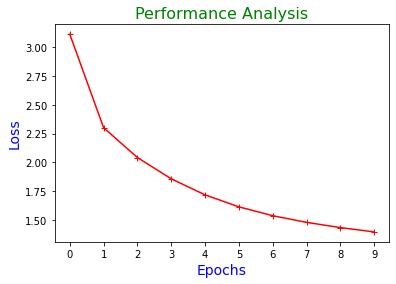

In [ ]:
 plt.plot(history.history['loss'], '+-r')
 plt.title('Performance Analysis', size=16, color='green')
 plt.xlabel('Epochs', size=14, color='blue')
 plt.ylabel('Loss', size=14, color='blue')
 plt.xticks(range(10))
 plt.show() 

### **Next Character Prediction**

In [ ]:
 # reset previous states of model
 model.reset_states() 

In [ ]:
sample = 'ANTHONIO:'
# vectorize the string
sample_vector = [tokenizer[s] for s in sample]
predicted = sample_vector
# convert into tensor of required dimensions
sample_tensor = tf.expand_dims(sample_vector, 0) 
# broadcast to first dimension to 64 
sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# predict next 1000 characters
# temperature is a sensitive variable to adjust prediction
temperature = 0.6

for i in range(1000):
  pred = model(sample_tensor)
  # reduce unnecessary dimensions
  pred = pred[0].numpy()/temperature
  pred = tf.random.categorical(pred, num_samples=1)[-1,0].numpy()
  predicted.append(pred)
  sample_tensor = predicted[-99:]
  sample_tensor = tf.expand_dims([pred],0)
  # broadcast to first dimension to 64 
  sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# convert the integers back to characters
pred_char = [vocabulary[i] for i in predicted]
generated = ''.join(pred_char)
print(generated)


ANTHONIO:
Not far your body of are thus be gone.

PETRUCHIO:
He hath sat, the wayer is thy hand,
The gentleman of the good sir,
Should be so right with a counteny virtuous son.

TRANIO:
The marriage, the place music be sended means
And where is love as it some petermines nor to do should be
And so being me on the said.

DUKE VINCENTIO:
My sight to will be more than at she be speak.

BAPTISTA:
This is the wind of the issue the means
As estent moneyed the merry of the stranger of the slander.

PETRUCHIO:
The sun, sir, it the moun is Bolingbroke,
And so his name of mine own son the world.

BIONDELLO:

DUKE VINCENTIO:
My mischer of his moon! thou art not from the will.

CETRUCHIO:
What is the hand, one word be thou not stand
By his contrary, but thou wast content
And that we must be white of her dound
And as the mear'st with the sea-
And not his son of steel.

ANTONIO:
He shall was so marry for the came his mean
Of my blood, here she may thou didst not rest.

PETRUCHIO:
He cannot come to t

In [ ]:
sample = 'ANTHONIO:'
# vectorize the string
sample_vector = [tokenizer[s] for s in sample]
predicted = sample_vector
# convert into tensor of required dimensions
sample_tensor = tf.expand_dims(sample_vector, 0) 
# broadcast to first dimension to 64 
sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# predict next 1000 characters
# vary temperature to change randomness
temperature = 0.8

for i in range(1000):
  pred = model(sample_tensor)
  # reduce unnecessary dimensions
  pred = pred[0].numpy()/temperature
  pred = tf.random.categorical(pred, num_samples=1)[-1,0].numpy()
  predicted.append(pred)
  sample_tensor = predicted[-99:]
  sample_tensor = tf.expand_dims([pred],0)
  # broadcast to first dimension to 64 
  sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# integer to text decoding
pred_char = [vocabulary[i] for i in predicted]
generated = ''.join(pred_char)
print(generated)

ANTHONIO:
I know, sir.

ANTANIO:
Why, he issurn's worship, to come the truth,
For, I'll seen him and the horse that should
And true sood did hath procond my else
And kill'd all brave we go to her humd
The bitt dishourd he hath presently the orier and the
gime and all moster of the belling pover?
By the Lord did he will think out in the
duke violighness gap-man's too and telling
That they comes and man in place to mean!

MARCIUS:
A pistress I have been and the friendly stungs.

Warsthars to our meaning.

GREMIO:
Girst Clamentair, the give but the strength;
But indeed-son like and spirit'st me.

ARIEL:
I must find no morrow beght of a cred;
She shall be more thas well.

KATHARINA:
It not to be triop; he is not as not hit
UHouch news and courtey of his bed and mind
To say?

GRUMIO:
I not, sir.

PROSPERO:
chy hath all heavens.

DUKE VINCENTIO:
What, throok my son-swer of the most thing she dread,
And charged for the must make abbeard?

DUKE VINCENTIO:
We have all trud; but I cannot wall,
W

In [ ]:
sample = 'He'
# vectorize the string
sample_vector = [tokenizer[s] for s in sample]
predicted = sample_vector
# convert into tensor of required dimensions
sample_tensor = tf.expand_dims(sample_vector, 0) 
# broadcast to first dimension to 64 
sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# predict next 1000 characters
# vary temperature to change randomness
temperature = 0.5

for i in range(100):
  pred = model(sample_tensor)
  # reduce unnecessary dimensions
  pred = pred[0].numpy()/temperature
  pred = tf.random.categorical(pred, num_samples=1)[-1,0].numpy()
  predicted.append(pred)
  sample_tensor = predicted[-99:]
  sample_tensor = tf.expand_dims([pred],0)
  # broadcast to first dimension to 64 
  sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# integer to text decoding
pred_char = [vocabulary[i] for i in predicted]
generated = ''.join(pred_char)
print(generated)

Hed maid is fair and so all the king's death.

DUKE VINCENTIO:
What, is the bear of death, thou wilt d


In [ ]:
sample = 'Not'
# vectorize the string
sample_vector = [tokenizer[s] for s in sample]
predicted = sample_vector
# convert into tensor of required dimensions
sample_tensor = tf.expand_dims(sample_vector, 0) 
# broadcast to first dimension to 64 
sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# predict next 1000 characters
# vary temperature to change randomness
temperature = 0.8

for i in range(100):
  pred = model(sample_tensor)
  # reduce unnecessary dimensions
  pred = pred[0].numpy()/temperature
  pred = tf.random.categorical(pred, num_samples=1)[-1,0].numpy()
  predicted.append(pred)
  sample_tensor = predicted[-99:]
  sample_tensor = tf.expand_dims([pred],0)
  # broadcast to first dimension to 64 
  sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

# integer to text decoding
pred_char = [vocabulary[i] for i in predicted]
generated = ''.join(pred_char)
print(generated)

Not the good polianing the prines
And in the hour out so far with as
but old that you best up by this e
